# Introduction to Continuum Mechanics : The 1D Burger's equation 

In [16]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The code is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>. If a figure seems to have a problem (not interactive), try to actualize it, by clicking on it and then pressing shift+enter''')

Before we start, we import some preliminary libraries. We will also import (below) the accompanying `Burger.py` file, which contains the actual solver and plotting routine.

As an introduction, here is a video to watch, and please look at the formation of the traffic jam.

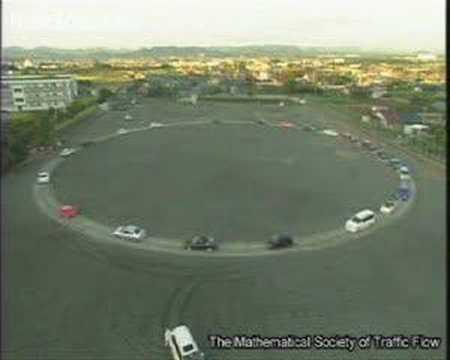

In [17]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Suugn-p5C1M', width=720, height=480)


In this video, one can notice that, since the cars are relatively close to each other, a simple perturbation will propagate through the traffic. 

One can also clearly see it in this animation (source : Martin Treiber) , where this situation is simulated: http://www.traffic-simulation.de/ring.html.
Try to find a situation where it seems to be stable, but after some time, some perturbation propagates.


What if we could represent this in a mathematical model ? 

We will see that we can use the continuum mechanics theory to mathematically modelize the traffic (Source : Wikipedia "https://en.wikipedia.org/wiki/Continuum_mechanics") :

Consider car traffic on a highway, with just one lane for simplicity. Somewhat surprisingly, and in a tribute to its effectiveness, continuum mechanics effectively models the movement of cars via a partial differential equation (PDE) for the density of cars. The familiarity of this situation empowers us to understand a little of the continuum-discrete dichotomy underlying continuum modelling in general.

To start modelling define that: $\textit{x}$ measure distance (in km) along the highway; $\textit{t}$ is time (in minutes); $\rho$ (x,t)  is the density of cars on the highway (in cars/km in the lane); and $\textit{u}$(x,t) is the flow velocity (average velocity) of those cars 'at' position $\textit{x}$.


Cars do not appear and disappear. Consider any group of cars: from the particular car at the back of the group located at $\textit{x}$=$\textit{a}$(t) to the particular car at the front located at $\textit{x}$=$\textit{b}$(t). The total number of cars in this group \begin{equation*} N= \int_{a(t)}^{b(t)} \rho(x,t)dx \end{equation*}
Since cars are conserved (if there is overtaking, then the "car at the front \ back" may become a different car) \begin{equation}\frac{dN}{dt}=0.\end{equation}


But via the Leibniz integral rule we have:
\begin{align}
\frac{dN}{dt}&=\frac{d}{dt}\int_{a(t)}^{b(t)}\rho(x,t)dx =\int_a^b\frac{\partial\rho}{\partial t}dx+\rho(b,t)\frac{db}{dt}-\rho(a,t)\frac{da}{dt}\\
&=\int_a^b\frac{\partial\rho}{\partial t}dx+\rho(b,t)u(b,t)-\rho(a,t)u(a,t)\\
&=\int_a^b\big[\frac{\partial \rho}{\partial t}+\frac{\partial}{\partial x}(\rho u)\big]dx
\end{align}
This integral being zero holds for all groups, that is, for all intervals [a,b]. The only way an integral can be zero for all intervals is if the integrand is zero for all x. Consequently, conservation derives the first order nonlinear conservation PDE:
$\frac{\partial \rho}{\partial t}+\frac{\partial}{\partial x}(\rho u)=0$

The previous PDE is one equation with two unknowns, so another equation is needed to form a well-posed problem. Such an extra equation is typically needed in continuum mechanics and typically comes from experiments. For car traffic it is well established that cars typically travel at a speed depending upon density, u=V(\rho) for some experimentally determined function V that is a decreasing function of density. For example, experiments in the Lincoln Tunnel found that a good fit (except at low density) is obtained by \begin{equation} u=V(\rho )=27.5\ln(\frac{142}{\rho} )\end{equation}( km/hr for density in cars/km). See the figure below for a representation of the experimental relationship, between the density and the velocity
Thus the basic continuum model for car traffic is the PDE
\begin{equation}
\frac{\partial \rho}{\partial t}+\frac{\partial}{\partial x}[\rho V(\rho)]=0
\end{equation}
for the car density $\rho(x,t)$ on the highway.
We will see the relation between a traffic jam, and the resolution of the 1-D Burger's equation. Indeed, this equation (viscous or inviscid) is heavily used in the modelisation of the dynamics of the gases (to represent the displacement of a shock wave), or in the road traffic, to represent the evolution of a traffic jam). 

In [18]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The code is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>. If a figure seems to have a problem (not interactive), try to actualize it, by clicking on it and then pressing shift+enter''')

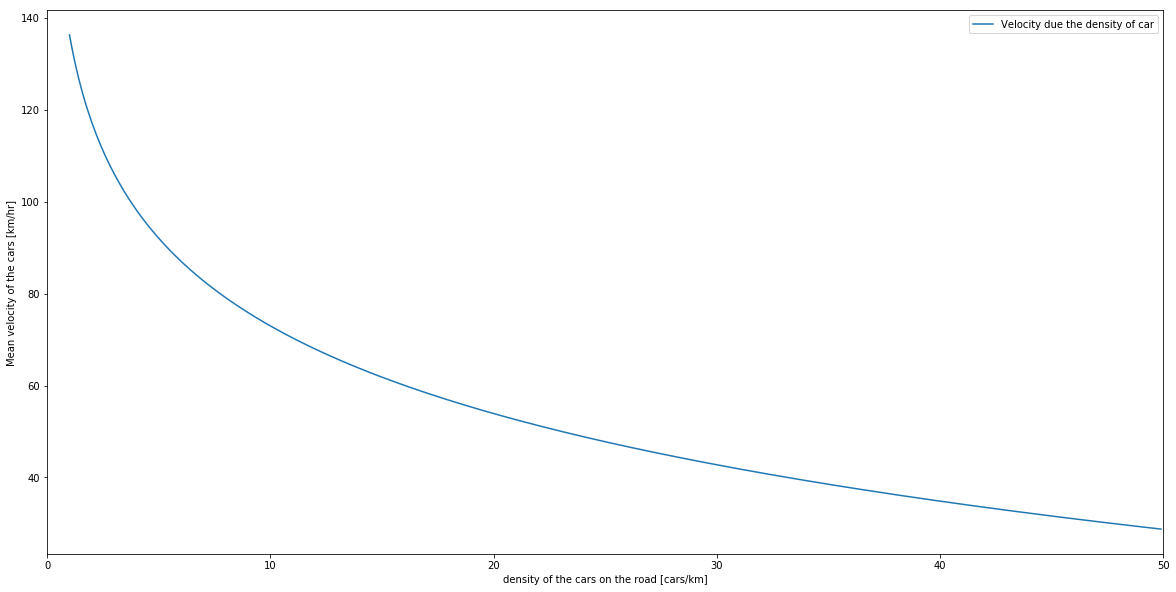

In [19]:
from Burger import plot_log
plot_log()

# The Burger Equation

So far, we have 
\begin{equation}
\frac{\partial \rho}{\partial t}+\frac{\partial}{\partial x}[\rho V(\rho)]=0
\end{equation}
As we can notice, this equation is relatively similar to the following equation, which corresponds to the viscous 1-D Burger differential equations:
$$
\frac{\partial{u}}{{\partial{t}}}+u*\frac{\partial{u}}{\partial{x}}=\nu*\frac{\partial^2{u}}{\partial^2{x}}
$$
Since we're observing the inviscid case, we will set $\nu$ to 0, and we end up with the equation :
$$
\frac{\partial{u}}{{\partial{t}}}+u*\frac{\partial{u}}{\partial{x}}=0
$$

In fact, the inviscid 1D burger equation corresponds is a very good modelisation of the density of cars, in the case where $V(\rho)=\frac{\rho}{2}$, offently used to described the creation of a shock wave in a fluid.


## Question 1 : 

This equation corresponds to the inviscid 1-D Burger differential equation.

In the following multiple choices, which are the correct answers?

a)The inviscid Burger equation is a first order non-linear equation

b)The viscous Burger equation is a second order linear equation

c)The inviscid Burger equation is a first order linear equation

d)The viscous Burger equation is a first order non-linear equation

In [3]:
from ipywidgets import interact
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [21]:
from ipywidgets import interactive, fixed
"""RESPONSE TO THE FIRST QUESTION""" """"Multiple question can be set, and then we count the result, instead of giving al lthe answer at once"""
from  Question_Burger import Question_type1
interactive(Question_type1, res1=['Choose an answer','a', 'b', 'c', 'd'], res2=['Choose an answer','a', 'b', 'c', 'd'], res3=['Choose an answer','a', 'b', 'c', 'd'], res4=['Choose an answer','a', 'b', 'c', 'd'], res5=['Choose an answer','a', 'b', 'c', 'd'], res6=['Choose an answer','a', 'b', 'c', 'd'], res7=['Choose an answer','a', 'b', 'c', 'd'], res8=['Choose an answer','a', 'b', 'c', 'd'])


interactive(children=(Dropdown(description='res1', options=('Choose an answer', 'a', 'b', 'c', 'd'), value='Ch…

In [22]:
from ipywidgets import interactive, fixed
from  Question_Burger import Question_type2
interactive(Question_type2, res1=['Choose an answer','a', 'b', 'c', 'd'], res2=['Choose an answer','a', 'b', 'c', 'd'], res3=['Choose an answer','a', 'b', 'c', 'd'], res4=['Choose an answer','a', 'b', 'c', 'd'], res5=['Choose an answer','a', 'b', 'c', 'd'], res6=['Choose an answer','a', 'b', 'c', 'd'], res7=['Choose an answer','a', 'b', 'c', 'd'], res8=['Choose an answer','a', 'b', 'c', 'd'], Finished=False)


interactive(children=(Dropdown(description='res1', options=('Choose an answer', 'a', 'b', 'c', 'd'), value='Ch…

Some things could be said about the discretization, and the way the calculation are made. This has for goal the understanding of the use of the discretization in non-linear equation.


# Interactive figure

In [23]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The code is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>. If a figure seems to have a problem (not interactive), try to actualize it, by clicking on it and then pressing shift+enter''')

Below, an interactive figure can be used  manipuled using the sliders. Two different types of initial conditions can be chosen. The first one is a square wave,, the second one is a peak, the third one is a sinusoidal and the last one is a gaussian (centered around 1 and with a $ \sigma$ of 0.1).

t the time slider. By changing its value, one can observe the evolution of the figure through the time. Take also a look of the difference between the the high amplitude and the low amplitude initial condition.

In [24]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The code is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>. If a figure seems to have a problem (not interactive), try to actualize it, by clicking on it and then pressing shift+enter''')

In [4]:
from Burger import convection
#Normal : (type_wave='square', nt=301, nx=101, tmax=0.8, xmax=2.0, c=0.5, amp=5.0)


u, x=convection(type_wave='square', nt=301, nx=101, tmax=1, xmax=3.0, c=0.5, amp=5.0)
v,x=convection(type_wave='square', nt=301, nx=101, tmax=1, xmax=3.0, c=0.5, amp=2.0)
p = figure(title="", plot_height=500, plot_width=1000, y_range=(-1,7),
           background_fill_color='#ffffff')
y=np.zeros(len(u.square))
r1 = p.line(x, y, color="#88CC68", legend='u (high amplitude)', line_width=1.5, alpha=0.8)
r2 = p.line(x, y, color="#6888cc", legend='v (low amplitude)', line_width=1.5, alpha=0.8)

def update(type_wave='square', t=0):
    if   type_wave == "square":
        y1 = u.square[:, t]
        y2 = v.square[:, t]
    elif type_wave == "peak":
        y1= u.peak[:,t]
        y2= v.peak[:,t]
    elif type_wave == "sine":
        y1= u.sine[:,t]
        y2= v.sine[:,t]
    elif type_wave == "exp":
        y1= u.exp[:,t]
        y2= v.exp[:,t]
    r1.data_source.data['y'] = y1
    r2.data_source.data['y'] = y2
    push_notebook()

show(p, notebook_handle=True)

interact(update, type_wave=['square', 'peak', 'sine', 'exp'], t=(0,249));

interactive(children=(Dropdown(description='type_wave', options=('square', 'peak', 'sine', 'exp'), value='squa…

In [5]:
from Burger import convection2
#Normal : (type_wave='square', nt=301, nx=101, tmax=0.8, xmax=2.0, c=0.5, amp=5.0)
u, x=convection2(type_wave='square', nt=301, nx=101, tmax=1, xmax=3.0, c=0.5, amp=1)
p = figure(title="", plot_height=500, plot_width=1000, y_range=(-2,8),
           background_fill_color='#ffffff')
y=np.zeros(len(u.amp2.square))
r1 = p.line(x, y, color="#88CC68", legend='u (high amplitude)', line_width=1.5, alpha=0.8)
def update(type_wave='square', t=0, amp=1):
        if amp==2:
            if   type_wave == "square":
                y1 = u.amp2.square[:, t]
            elif type_wave == "peak":
                y1= u.amp2.peak[:,t]
            elif type_wave == "sine":
                y1= u.amp2.sine[:,t]
            elif type_wave == "exp":
                y1= u.amp2.exp[:,t]
            r1.data_source.data['y'] = y1
            push_notebook()
        elif amp==3:
            if   type_wave == "square":
                y1 = u.amp3.square[:, t]
            elif type_wave == "peak":
                y1= u.amp3.peak[:,t]
            elif type_wave == "sine":
                y1= u.amp3.sine[:,t]
            elif type_wave == "exp":
                y1= u.amp3.exp[:,t]
            r1.data_source.data['y'] = y1
            push_notebook()

        elif amp==4:
            if   type_wave == "square":
                y1 = u.amp4.square[:, t]
            elif type_wave == "peak":
                y1= u.amp4.peak[:,t]
            elif type_wave == "sine":
                y1= u.amp4.sine[:,t]
            elif type_wave == "exp":
                y1= u.amp4.exp[:,t]
            r1.data_source.data['y'] = y1
            push_notebook()
        elif amp==5:
            if   type_wave == "square":
                y1 = u.amp5.square[:, t]
            elif type_wave == "peak":
                y1= u.amp5.peak[:,t]
            elif type_wave == "sine":
                y1= u.amp5.sine[:,t]
            elif type_wave == "exp":
                y1= u.amp5.exp[:,t]
            r1.data_source.data['y'] = y1
            push_notebook()
        elif amp==6:
            if   type_wave == "square":
                y1 = u.amp6.square[:, t]
            elif type_wave == "peak":
                y1= u.amp6.peak[:,t]
            elif type_wave == "sine":
                y1= u.amp6.sine[:,t]
            elif type_wave == "exp":
                y1= u.amp6.exp[:,t]
            r1.data_source.data['y'] = y1
            push_notebook()
        elif amp==7:
            if   type_wave == "square":
                y1 = u.amp7.square[:, t]
            elif type_wave == "peak":
                y1= u.amp7.peak[:,t]
            elif type_wave == "sine":
                y1= u.amp7.sine[:,t]
            elif type_wave == "exp":
                y1= u.amp7.exp[:,t]
            r1.data_source.data['y'] = y1
            push_notebook()


show(p, notebook_handle=True)

interact(update, type_wave=['square', 'peak', 'sine', 'exp'], t=(0,249), amp=(2,7));

interactive(children=(Dropdown(description='type_wave', options=('square', 'peak', 'sine', 'exp'), value='squa…

As we can see, the high amplitude atteins the non-singular solution (shock wave front) far more rapidly than the low amplitude

# Space-time representation

In [27]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The code is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>. If a figure seems to have a problem (not interactive), try to actualize it, by clicking on it and then pressing shift+enter''')

In [28]:
from Burger import convection2
from Burger import plot_color

u,x=convection2(type_wave='square', nt=301, nx=101, tmax=0.8, xmax=3.0, c=0.5, amp=3.0)
def update(type_wave='square', amp=0):
    nt=300
    if amp==2:
        if   type_wave == "square":
            plot_color(u.amp2.square,x, nt)
        elif type_wave == "peak":
             plot_color(u.amp2.peak,x, nt)
        elif type_wave == "sine":
             plot_color(u.amp2.sine,x, nt)
        elif type_wave == "exp":
             plot_color(u.amp2.exp,x, nt)
    elif amp==3:
        if   type_wave == "square":
            plot_color(u.amp3.square,x, nt)
        elif type_wave == "peak":
             plot_color(u.amp3.peak,x, nt)
        elif type_wave == "sine":
             plot_color(u.amp3.sine,x, nt)
        elif type_wave == "exp":
             plot_color(u.amp3.exp,x, nt)
    
    elif amp==4:
        if   type_wave == "square":
            plot_color(u.amp4.square,x, nt)
        elif type_wave == "peak":
             plot_color(u.amp4.peak,x, nt)
        elif type_wave == "sine":
             plot_color(u.amp4.sine,x, nt)
        elif type_wave == "exp":
             plot_color(u.amp4.exp,x, nt)
    elif amp==5:
        if   type_wave == "square":
            plot_color(u.amp5.square,x, nt)
        elif type_wave == "peak":
             plot_color(u.amp5.peak,x, nt)
        elif type_wave == "sine":
             plot_color(u.amp5.sine,x, nt)
        elif type_wave == "exp":
             plot_color(u.amp5.exp,x, nt)
                
    elif amp==6:
        if   type_wave == "square":
            plot_color(u.amp6.square,x, nt)
        elif type_wave == "peak":
             plot_color(u.amp6.peak,x, nt)
        elif type_wave == "sine":
             plot_color(u.amp6.sine,x, nt)
        elif type_wave == "exp":
             plot_color(u.amp6.exp,x, nt)
                
    elif amp==7:
        if   type_wave == "square":
            plot_color(u.amp7.square,x, nt)
        elif type_wave == "peak":
             plot_color(u.amp7.peak,x, nt)
        elif type_wave == "sine":
             plot_color(u.amp7.sine,x, nt)
        elif type_wave == "exp":
             plot_color(u.amp7.exp,x, nt)
                

interact(update, type_wave=['square', 'peak', 'sine', 'exp'], amp=(2,7));

interactive(children=(Dropdown(description='type_wave', options=('square', 'peak', 'sine', 'exp'), value='squa…

Now, if we observe the results one could see the formation of the shock wave. Now, what could be the real interpretation of this graph ? (in terms of car, velocity etc...)

## Going further...

We could go further by adding the viscosity (nu not equal to 0) see the viscous 1-D Burger equation.

In [29]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The code is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>. If a figure seems to have a problem (not interactive), try to actualize it, by clicking on it and then pressing shift+enter''')

In [30]:
from Burger import convection_visc
#Normal : (type_wave='square', nt=301, nx=101, tmax=0.8, xmax=2.0, c=0.5, amp=5.0)
u, x=convection_visc(type_wave='square', nt=401, nx=101, tmax=0.8, xmax=3.0, c=0.5, amp=5.0, nu=0.1)
v,x=convection_visc(type_wave='square', nt=401, nx=101, tmax=0.8, xmax=3.0, c=0.5, amp=2.0, nu=0.1)
p = figure(title="", plot_height=500, plot_width=1000, y_range=(-2,7),
           background_fill_color='#ffffff')
y=np.zeros(len(u.square))
r1 = p.line(x, y, color="#88CC68", legend='u (high amplitude), no viscosity', line_width=1.5, alpha=0.8)
r2 = p.line(x, y, color="#6888cc", legend='v (low amplitude), no viscosity', line_width=1.5, alpha=0.8)
r3 = p.line(x, y, color="#8a1bc9", legend='u (low amplitude), with viscosity', line_width=1.5, alpha=0.8)
r4 = p.line(x, y, color="#c96a1b", legend='v (low amplitude), with viscosity', line_width=1.5, alpha=0.8)
def update(type_wave='square', t=0):
    if   type_wave == "square":
        y1 = u.square[:, t]
        y2 = v.square[:, t]
        y3 = u.square_visc[:, t]
        y4 = v.square_visc[:, t]
    elif type_wave == "peak":
        y1= u.peak[:,t]
        y2= v.peak[:,t]
        y3 = u.peak_visc[:, t]
        y4 = v.peak_visc[:, t]
    elif type_wave == "sine":
        y1= u.sine[:,t]
        y2= v.sine[:,t]
        y3 = u.sine_visc[:, t]
        y4 = v.sine_visc[:, t]
    elif type_wave == "exp":
        y1= u.exp[:,t]
        y2= v.exp[:,t]
        y3 = u.exp_visc[:, t]
        y4 = v.exp_visc[:, t]
    r1.data_source.data['y'] = y1
    r2.data_source.data['y'] = y2
    r3.data_source.data['y'] = y3
    r4.data_source.data['y'] = y4
    push_notebook()

show(p, notebook_handle=True)

interact(update, type_wave=['square', 'peak', 'sine', 'exp'], t=(0,249));


interactive(children=(Dropdown(description='type_wave', options=('square', 'peak', 'sine', 'exp'), value='squa…